In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Part** **A**

- **DOMAIN:** Electronics and Telecommunication.
- **CONTEXT:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.
- **DATA DESCRIPTION:** The data set contains information on various signal tests performed:
 1. Parameters: Various measurable signal parameters.
 2. Signal_Quality: Final signal strength or quality.
- **PROJECT OBJECTIVE:** To build a classifier which can use the given parameters to determine the signal strength or quality.

### 1. Data import and Understanding.

### **1.A.  Read the 'Signals.csv' as DatFrame and import required libraries.**

#### **Importig necessary Libraries**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
import h5py
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization,Dropout
from tensorflow.keras import losses, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
path = '/content/drive/MyDrive/AIML DATASETS USED IN THE PROJECT/NN Project Data - Signal.csv'

# Read the CSV file as a DataFrame
df = pd.read_csv(path)

In [27]:
# Display the first few rows of the DataFrame
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
# Display the last few rows of the DataFrame
df.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [29]:
# Print shape and columns of the dataset
print("Shape:")
print(df.shape)
print("Columns:")
print(df.columns)

Shape:
(1599, 12)
Columns:
Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')


In [30]:
# Check the data types of the columns for the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- All the columns in the data are numerical in nature.
- Signal_Strength is the target column.

### **1.B.  Check for missing values and print percentage for each attribute.**

In [31]:
# Checking for missing values and calculating the percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Print the percentage of missing values for each attribute
print(missing_percentage)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


There are no missing values present in the dataset

#### **1.C. Check for presence of duplicate records in the dataset and impute with appropriate method.**

In [32]:
# Check for presence of duplicate records in the dataset
duplicates = df.duplicated().sum()
print("Number of duplicate records:", duplicates)

# Remove duplicates, keeping the first occurrence
df.drop_duplicates(keep='first', inplace=True)

# Rechecking if there are any duplicate values present after removal
duplicates_after_removal = df.duplicated().sum()
print("Number of duplicate records after removal:", duplicates_after_removal)

Number of duplicate records: 240
Number of duplicate records after removal: 0


### **1.D. Visualise distribution of the target variable.**

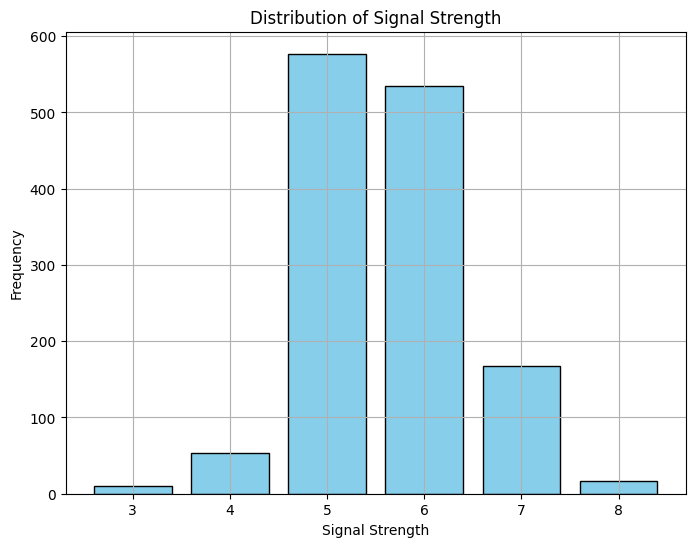

In [33]:
target_column = 'Signal_Strength'

# Calculate value counts for each category
value_counts = df[target_column].value_counts()

# Create a vertical bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### **1.E. Share insights from the initial data analysis (at least 2)**.

- The signal predominantly favors values around 5 and 6, displaying a bias in that range.
- The least signal strength is 3.
- The highest frequency is around 580.
- Additionally, the sensors have varying ranges for different attributes, underscoring the need for normalization.

### 2. Data preprocessing. 

### **2.A. Split the data into X & Y.**

In [34]:
X = df.drop('Signal_Strength',axis=1)   # Independent variables
y = df['Signal_Strength']               # Target variable

 ### **2.B. Split the data into train & test with 70:30 proportion.**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

### **2.C. Print shape of all the 4 variables and verify if train and test data is in sync.**

In [36]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of y_train: (951,)
Shape of y_test: (408,)


### **2.D. Normalise the train and test data with appropriate method.**

In [37]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled

array([[-1.35376931, -1.30626009, -0.10719318, ...,  0.12443142,
        -0.68165575, -0.10569495],
       [ 2.43446605, -0.75397567,  1.12533943, ..., -1.52261956,
         0.90152168, -0.10569495],
       [ 2.03868026, -0.80920411,  1.12533943, ..., -0.95248653,
        -0.28586139, -0.10569495],
       ...,
       [-1.07106518,  0.18490784, -0.62074844, ...,  0.12443142,
        -0.34240344,  0.08145645],
       [-1.18414683,  0.68196382, -1.08294817, ...,  1.64478616,
        -0.68165575,  1.4383041 ],
       [-0.84490187,  1.5656189 , -1.1343037 , ...,  1.26469748,
        -0.00315113,  0.36218355]])

In [39]:
X_test_scaled

array([[ 1.81251696,  0.35059317,  1.63889469, ..., -0.8257903 ,
        -0.05969319,  0.54933495],
       [-0.44911609,  1.34470513, -0.36397081, ..., -0.69909407,
        -0.45548754, -1.13502765],
       [ 2.43446605, -1.19580321,  2.30651652, ..., -2.72623373,
         0.90152168, -0.57357345],
       ...,
       [ 1.75597613, -1.47194542,  0.8685618 , ..., -1.20587898,
         0.90152168, -1.04145195],
       [-0.95798353,  1.51039046, -1.23701475, ...,  1.32804559,
        -0.90782395,  1.67224335],
       [-0.78836105, -0.09123437, -0.20990424, ...,  0.56786822,
         1.01460578,  0.73648635]])

### **2.E.Transform Labels into format acceptable by Neural Network.**

In [40]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [41]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [42]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### 3. Model Training & Evaluation using Neural Network.

### **3.A. Design a Neural Network to train a classifier.**

In [43]:
NN_model_1= Sequential()

# The Input Layer :
NN_model_1.add(Dense(11, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
NN_model_1.add(BatchNormalization())

NN_model_1.add(Dense(9,activation='relu'))

# The Output Layer :
NN_model_1.add(Dense(9,activation='softmax'))  # except softmax

# Compile the network :
NN_model_1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['MeanSquaredError'])
NN_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 batch_normalization_1 (Bat  (None, 11)                44        
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 9)                 108       
                                                                 
 dense_5 (Dense)             (None, 9)                 90        
                                                                 
Total params: 374 (1.46 KB)
Trainable params: 352 (1.38 KB)
Non-trainable params: 22 (88.00 Byte)
_________________________________________________________________


### **3.B. Train the classifier using previously designed Architecture**

In [44]:
NN_model_training_1 = NN_model_1.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=100, batch_size=128)

Epoch 1/100
8/8 [==============================] - 2s 27ms/step - loss: 0.1951 - mean_squared_error: 0.1013 - val_loss: 0.1963 - val_mean_squared_error: 0.0976
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1902 - mean_squared_error: 0.0968 - val_loss: 0.1953 - val_mean_squared_error: 0.0967
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1844 - mean_squared_error: 0.0923 - val_loss: 0.1940 - val_mean_squared_error: 0.0955
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1779 - mean_squared_error: 0.0881 - val_loss: 0.1924 - val_mean_squared_error: 0.0941
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1717 - mean_squared_error: 0.0848 - val_loss: 0.1904 - val_mean_squared_error: 0.0924
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1655 - mean_squared_error: 0.0819 - val_loss: 0.1882 - val_mean_squared_error: 0.0906
Epoch 7/100
8/8 [=========================

### 3.C. Plot 2 separate visuals.

### i. Training Loss and Validation Loss.
### ii. Training Accuracy and Validation Accuracy.

In [45]:
# Access training history keys
history= NN_model_training_1.history.keys()
history

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

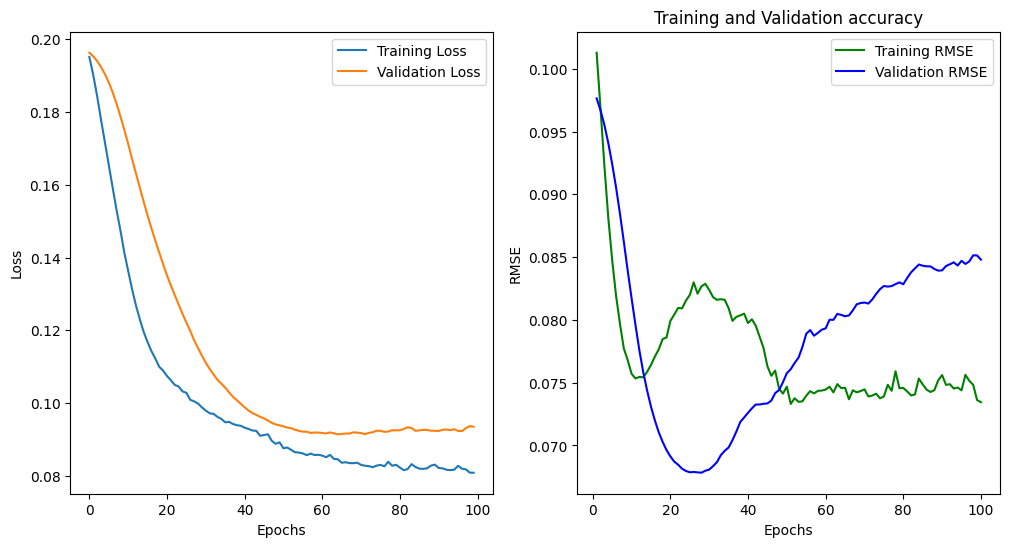

In [46]:
import matplotlib.pyplot as plt

# Plot Training Loss and Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
epochs = range(1, 100 + 1)
plt.plot(NN_model_training_1.history['loss'], label='Training Loss')
plt.plot(NN_model_training_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Corrected code to access RMSE values
Acc_train = NN_model_training_1.history['mean_squared_error']
Acc_val = NN_model_training_1.history['val_mean_squared_error']

plt.subplot(1, 2, 2)  # Add a subplot for accuracy
plt.plot(epochs, Acc_train, 'g', label='Training RMSE')
plt.plot(epochs, Acc_val, 'b', label='Validation RMSE')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### **3.D. Design new architecture/update existing architecture in attempt to improve the performance of the model.**

In [47]:
NN_model_2 = Sequential()

# The Input Layer :
NN_model_2.add(Dense(11, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
NN_model_2.add(BatchNormalization())

NN_model_2.add(Dense(9,activation='relu'))
NN_model_2.add(Dense(9,activation='relu'))

# The Output Layer :
NN_model_2.add(Dense(9,activation='softmax'))

# Compile the network :
NN_model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 batch_normalization_2 (Bat  (None, 11)                44        
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 9)                 108       
                                                                 
 dense_8 (Dense)             (None, 9)                 90        
                                                                 
 dense_9 (Dense)             (None, 9)                 90        
                                                                 
Total params: 464 (1.81 KB)
Trainable params: 442 (1.73 KB)
Non-trainable params: 22 (88.00 Byte)
______________________

In [48]:
NN_model_train_2 = NN_model_2.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 2s 11ms/step - loss: 2.2140 - accuracy: 0.0768 - val_loss: 2.1324 - val_accuracy: 0.3971
Epoch 2/100
30/30 [==============================] - 0s 6ms/step - loss: 2.0038 - accuracy: 0.2839 - val_loss: 2.0258 - val_accuracy: 0.3971
Epoch 3/100
30/30 [==============================] - 0s 6ms/step - loss: 1.8175 - accuracy: 0.4385 - val_loss: 1.8979 - val_accuracy: 0.3922
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 1.6407 - accuracy: 0.4543 - val_loss: 1.7664 - val_accuracy: 0.3995
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 1.4662 - accuracy: 0.4700 - val_loss: 1.6372 - val_accuracy: 0.4387
Epoch 6/100
30/30 [==============================] - 0s 9ms/step - loss: 1.3065 - accuracy: 0.4995 - val_loss: 1.5009 - val_accuracy: 0.5147
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 1.1873 - accuracy: 0.5258 - val_loss: 1.3688 - val_accuracy: 0.5637
Epoch 8/100


### **3.E. Plot visuals as in 3.C and share insights about difference observed in both the models.**

In [49]:
# Access training history keys
print(NN_model_train_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


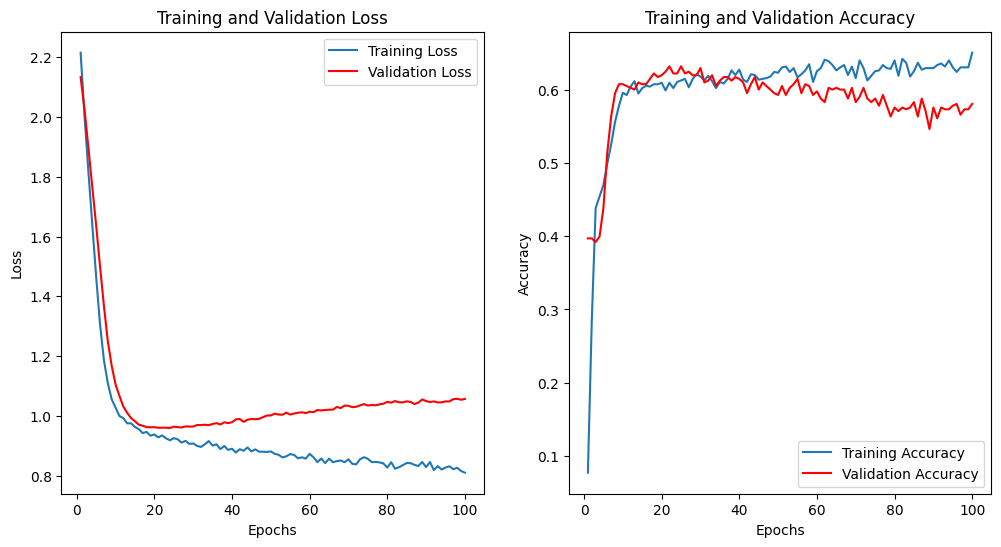

In [50]:
# Training loss and validation loss
train_loss = NN_model_train_2.history['loss']
val_loss = NN_model_train_2.history['val_loss']

# Training accuracy and validation accuracy
train_accuracy = NN_model_train_2.history['accuracy']
val_accuracy = NN_model_train_2.history['val_accuracy']

# Number of epochs
epochs = range(1,100+1)

# i.Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# ii.Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


- Loss is gradual in both training and testing data with batch size 128 but steeper with batch size 32.
- When an additional hidden layer is added, accuracy improves by 5%.


# **Part B**

- **DOMAIN:** Autonomous Vehicles.
- **CONTEXT:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.
- **DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

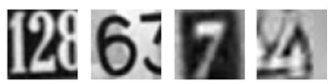

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site

- **PROJECT OBJECTIVE:** To build a digit classifier on the SVHN (Street View Housing Number) dataset.

### 1. Data Import and Exploration.

### **1.A. Read the .h5 file and assign to a variable.**

In [51]:
import h5py
hdf5_file_path = h5py.File("/content/drive/MyDrive/AIML DATASETS USED IN THE PROJECT/Autonomous_Vehicles_SVHN_single_grey1.h5","r")

### **1.B. Print all the keys from the .h5 file.**

In [52]:
print("Keys in the HDF5 file:")
for key in hdf5_file_path.keys():
    print(key)

Keys in the HDF5 file:
X_test
X_train
X_val
y_test
y_train
y_val


### **1.C. Split the data into X_train, X_test, Y_train, Y_test**

In [53]:
X_train = hdf5_file_path['X_train'][:]
X_test = hdf5_file_path['X_test'][:]
y_train = hdf5_file_path['y_train'][:]
y_test = hdf5_file_path['y_test'][:]

### 2. Data Visualisation and preprocessing.

### **2.A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.**

In [54]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
y_train shape: (42000,)
y_test shape: (18000,)


### **2.B. Visualise first 10 images in train data and print its corresponding labels.**

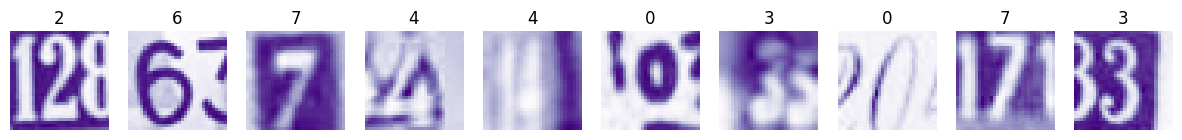

Labels for each of the above images: [2 6 7 4 4 0 3 0 7 3]


In [55]:
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='Purples_r')
    plt.axis('off')
    plt.title(str(y_train[i]))

plt.show()

print('Labels for each of the above images:', y_train[:10])

### **2.C. Reshape all the images with appropriate shape update the data in same variable.**


In [56]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [57]:
# Flatten the images
image_vector_size = 32*32
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)


In [58]:
# Check Shape of the images and the first image
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (1024,)

First image:
 [33.0704 30.2601 26.852  ... 49.6682 50.853  53.0377]


In [59]:
print("X_train",X_train.shape," X_test", X_test.shape, 'y_train',y_train.shape, 'y_test',y_test.shape)

X_train (42000, 1024)  X_test (18000, 1024) y_train (42000,) y_test (18000,)


### **2.D. Normalise the images i.e. Normalise the pixel values.**

In [60]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024) (42000,)
Resized Test set (18000, 1024) (18000,)


### **2.E. Transform Labels into format acceptable by Neural Network**

In [61]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [62]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [64]:
print(y_train.shape)
print(y_test.shape)

(42000, 10)
(18000, 10)


### **2.F. Print total Number of classes in the Dataset.**

In [65]:
num_classes = y_train.shape[1]
print("Total number of classes:", num_classes)


Total number of classes: 10


### 3. Model Training & Evaluation using Neural Network.

### **3.A. Design a Neural Network to train a classifier.**

In [66]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [67]:
# build the model
model = nn_model()

### **3.B. Train the classifier using previously designed Architecture (Use best suitable parameters).**

In [69]:
# Compile model
optimizer = optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [70]:
# Fit the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 4s - loss: 2.2914 - accuracy: 0.1179 - val_loss: 2.2315 - val_accuracy: 0.1348 - 4s/epoch - 30ms/step
Epoch 2/100
140/140 - 1s - loss: 2.0716 - accuracy: 0.2214 - val_loss: 1.8752 - val_accuracy: 0.3214 - 618ms/epoch - 4ms/step
Epoch 3/100
140/140 - 1s - loss: 1.7346 - accuracy: 0.3822 - val_loss: 1.5867 - val_accuracy: 0.4438 - 600ms/epoch - 4ms/step
Epoch 4/100
140/140 - 1s - loss: 1.5520 - accuracy: 0.4579 - val_loss: 1.4803 - val_accuracy: 0.4857 - 599ms/epoch - 4ms/step
Epoch 5/100
140/140 - 1s - loss: 1.4265 - accuracy: 0.5211 - val_loss: 1.3799 - val_accuracy: 0.5297 - 594ms/epoch - 4ms/step
Epoch 6/100
140/140 - 1s - loss: 1.3257 - accuracy: 0.5597 - val_loss: 1.2669 - val_accuracy: 0.5848 - 625ms/epoch - 4ms/step
Epoch 7/100
140/140 - 1s - loss: 1.2613 - accuracy: 0.5871 - val_loss: 1.2473 - val_accuracy: 0.5802 - 606ms/epoch - 4ms/step
Epoch 8/100
140/140 - 1s - loss: 1.1923 - accuracy: 0.6137 - val_loss: 1.1722 - val_accuracy: 0.6230 - 596ms/epoch - 4ms

### **3.C. Evaluate performance of the model with appropriate metrics.**

563/563 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1814
           1       0.82      0.83      0.82      1828
           2       0.89      0.78      0.83      1803
           3       0.75      0.75      0.75      1719
           4       0.78      0.86      0.82      1812
           5       0.71      0.81      0.76      1768
           6       0.77      0.82      0.79      1832
           7       0.87      0.83      0.85      1808
           8       0.79      0.73      0.76      1812
           9       0.80      0.79      0.79      1804

    accuracy                           0.80     18000
   macro avg       0.81      0.80      0.80     18000
weighted avg       0.81      0.80      0.80     18000



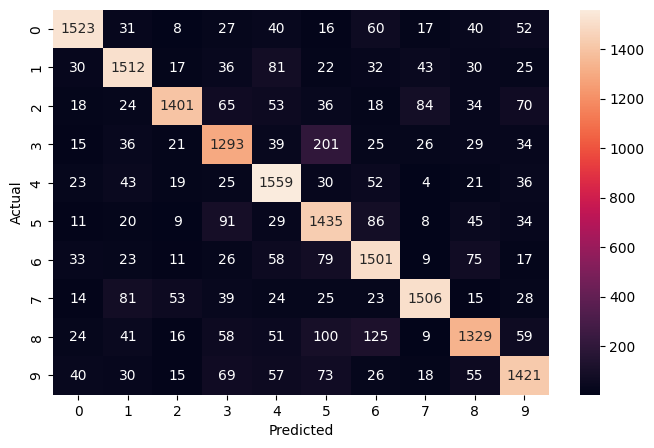

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting on the test data
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=-1)

# Converting each entry to a single label from a one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

# Printing the classification report
print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **3.D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.**

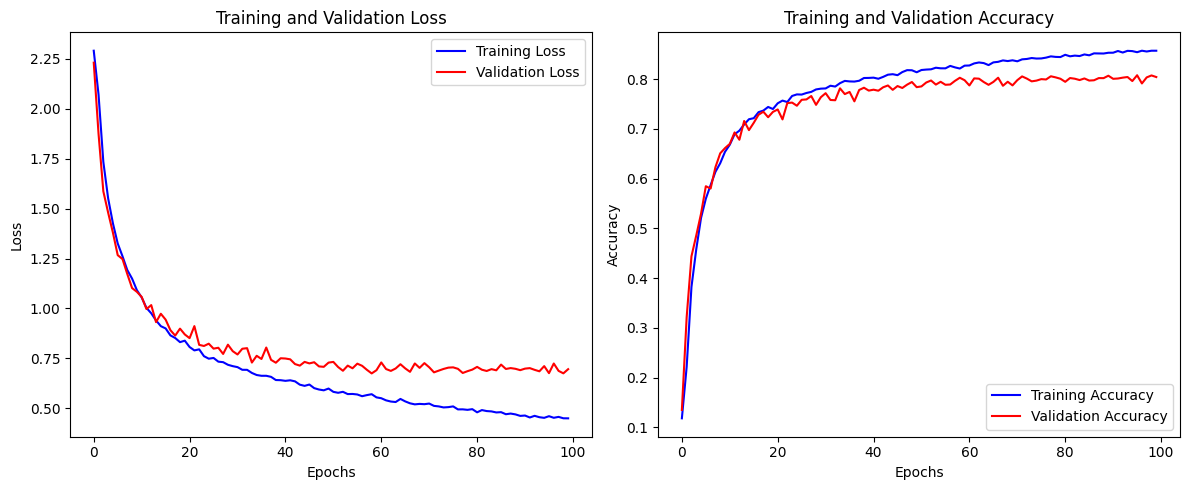

In [72]:
import matplotlib.pyplot as plt

# Extract the training history
train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
train_accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
# Plot training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

- The dataset contains about 10 classes, each representing the digits between 0 and 9.

- We conducted an experiment where we trained a Neural Network with dense hidden layers containing different numbers of units, and we successfully attained a final test accuracy of 81%.

- We can see that, as we continue training the model, it starts to exhibit overfitting on our dataset. This becomes evident in the graph provided, where the validation loss begins to rise and the validation accuracy begins to decrease after a certain stage.

- We can effectively differentiate between the various digits in this dataset due to the level of accuracy achieved.

















